In [1]:
import numpy as np
from scipy.integrate import solve_ivp, cumulative_trapezoid
import matplotlib.pyplot as plt
from saturation_thermodynamics import get_saturation_thermodynamics
import constants as const
import xarray as xr
from PB05_model import WalkerCirculationModel

# Test 1: no clouds, $\tau_{c}$=2hrs

CPU times: user 25.7 s, sys: 52.3 ms, total: 25.8 s
Wall time: 26.3 s


[Text(0.0, 0, '0'),
 Text(2000.0, 0, '2000'),
 Text(4000.0, 0, '4000'),
 Text(6000.0, 0, '6000'),
 Text(8000.0, 0, '8000'),
 Text(10000.0, 0, '10000')]

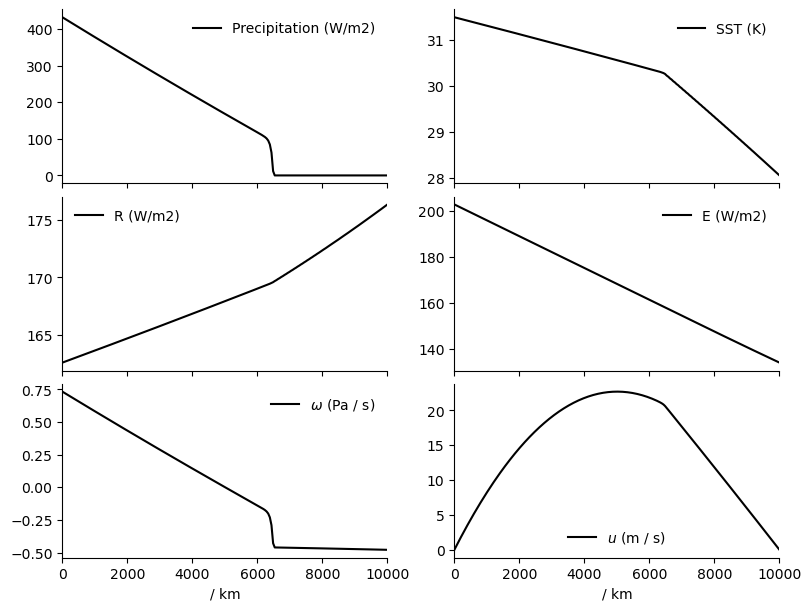

In [2]:
%%time

#================
# Reproduce Fig. 3 of Peters & Bretherton (2005)
#================

"""
No clouds
"""
# Example usage
model = WalkerCirculationModel(tau_c=2*3600, r_hs=0, r_hr=0, r_l=0)

# Solve
nday = 1000
t_span = (0, 86400*nday)  # 100 day simulation
sol = model.solve(t_span, t_eval=np.linspace(0,86400*nday,nday))

# Extract the solution
T = sol.y[:model.n, -1]
q = sol.y[model.n:2*model.n, -1]
Ts = sol.y[2*model.n:, -1]
P = model.precipitation(q, T)
R = model.R(T, q, Ts, P)
w = model.get_omega(P, R, T, model.x, q)
u = np.insert(cumulative_trapezoid(w/model.delta_p_T, model.x), 0, 0)
E = model.evaporation(T, Ts, q, P, u)

# Plot the results
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(8,6), layout='constrained')
axs[0,0].plot(model.x/1e3, (P), label='Precipitation (W/m2)', c='k')
axs[0,1].plot(model.x/1e3, Ts/const.cp + model.T_s0, label='SST (K)', c='k')
axs[1,0].plot(model.x/1e3, R, label='R (W/m2)', c='k')
axs[1,1].plot(model.x/1e3, E, label='E (W/m2)', c='k')
axs[2,0].plot(model.x/1e3, w, label=r'$\omega$ (Pa / s)', c='k')
axs[2,1].plot(model.x/1e3, u, label=r'$u$ (m / s)', c='k')

for ax in axs.flatten():
    ax.set_xlabel("")
    ax.set_xticks([0,2e3,4e3,6e3,8e3,10e3])
    ax.set_xticklabels(['','','','','',''])
    ax.legend(frameon=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(0,10e3)

#
axs[2,0].set_xlabel("/ km")
axs[2,1].set_xlabel("/ km")
axs[2,0].set_xticklabels(['0','2000','4000','6000','8000','10000'])
axs[2,1].set_xticklabels(['0','2000','4000','6000','8000','10000'])

# Test 2: impact of adding high clouds

CPU times: user 55.5 s, sys: 291 ms, total: 55.8 s
Wall time: 56 s


[Text(0.0, 0, '0'),
 Text(2000.0, 0, '2000'),
 Text(4000.0, 0, '4000'),
 Text(6000.0, 0, '6000'),
 Text(8000.0, 0, '8000'),
 Text(10000.0, 0, '10000')]

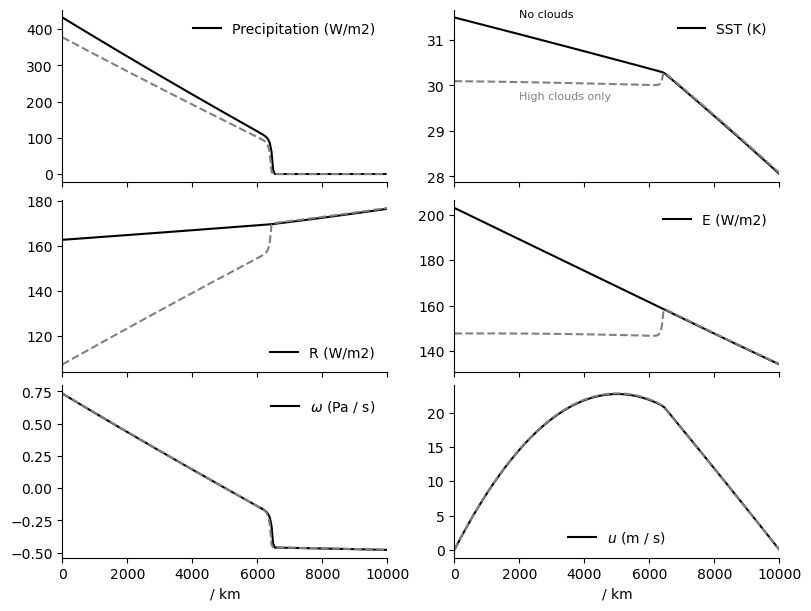

In [1346]:
%%time
#================
# Reproduce Fig. 4 of Peters & Bretherton (2005)
#================

"""
No clouds
"""
# Example usage
model = WalkerCirculationModel(tau_c=2*3600, r_hs=0, r_hr=0, r_l=0)

# Solve
nday = 1000
t_span = (0, 86400*nday)  # 1000 day simulation
sol = model.solve(t_span, t_eval=np.linspace(0,86400*nday,nday))

# Extract the solution
T = sol.y[:model.n, -1]
q = sol.y[model.n:2*model.n, -1]
Ts = sol.y[2*model.n:, -1]
P = model.precipitation(q, T)
R = model.R(T, q, Ts, P)
w = model.get_omega(P, R, T, model.x, q)
u = np.insert(cumulative_trapezoid(w/model.delta_p_T, model.x), 0, 0)
E = model.evaporation(T, Ts, q, P, u)

"""
With high clouds
"""
# Example usage
model2 = WalkerCirculationModel(tau_c=2*3600, r_l=0)

# Solve
nday = 1000
t_span = (0, 86400*nday)  # 1000 day simulation
sol2 = model2.solve(t_span, t_eval=np.linspace(0,86400*nday,nday))

# Extract the solution
T2 = sol2.y[:model.n, -1]
q2 = sol2.y[model.n:2*model.n, -1]
Ts2 = sol2.y[2*model.n:, -1]
P2 = model2.precipitation(q2, T2)
R2 = model2.R(T2, q2, Ts2, P2)
w2 = model2.get_omega(P2, R2, T2, model2.x, q2)
u2 = np.insert(cumulative_trapezoid(w2/model2.delta_p_T, model2.x), 0, 0)
E2 = model.evaporation(T2, Ts2, q2, P2, u2)

# Plot the results
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(8,6), layout='constrained')
axs[0,0].plot(model.x/1e3, (P), label='Precipitation (W/m2)', c='k')
axs[0,1].plot(model.x/1e3, Ts/const.cp + model.T_s0, label='SST (K)', c='k')
axs[1,0].plot(model.x/1e3, R, label='R (W/m2)', c='k')
axs[1,1].plot(model.x/1e3, E, label='E (W/m2)', c='k')
axs[2,0].plot(model.x/1e3, w, label=r'$\omega$ (Pa / s)', c='k')
axs[2,1].plot(model.x/1e3, u, label=r'$u$ (m / s)', c='k')

axs[0,0].plot(model.x/1e3, (P2),  c='grey', linestyle='--')
axs[0,1].plot(model.x/1e3, Ts2/const.cp + model.T_s0, c='grey', linestyle='--')
axs[1,0].plot(model.x/1e3, R2,  c='grey', linestyle='--')
axs[1,1].plot(model.x/1e3, E2,  c='grey', linestyle='--')
axs[2,0].plot(model.x/1e3, w2,  c='grey', linestyle='--')
axs[2,1].plot(model.x/1e3, u2, c='grey', linestyle='--')

for ax in axs.flatten():
    ax.set_xlabel("")
    ax.set_xticks([0,2e3,4e3,6e3,8e3,10e3])
    ax.set_xticklabels(['','','','','',''])
    ax.legend(frameon=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(0,10e3)

#
axs[0,1].text(2000,31.5, r"No clouds", c='k', fontsize=8)
axs[0,1].text(2000,29.7, r"High clouds only", c='grey', fontsize=8)
axs[2,0].set_xlabel("/ km")
axs[2,1].set_xlabel("/ km")
axs[2,0].set_xticklabels(['0','2000','4000','6000','8000','10000'])
axs[2,1].set_xticklabels(['0','2000','4000','6000','8000','10000'])

# Test 3: impact of adding low clouds

CPU times: user 1min 19s, sys: 688 ms, total: 1min 19s
Wall time: 1min 20s


[Text(0.0, 0, '0'),
 Text(2000.0, 0, '2000'),
 Text(4000.0, 0, '4000'),
 Text(6000.0, 0, '6000'),
 Text(8000.0, 0, '8000'),
 Text(10000.0, 0, '10000')]

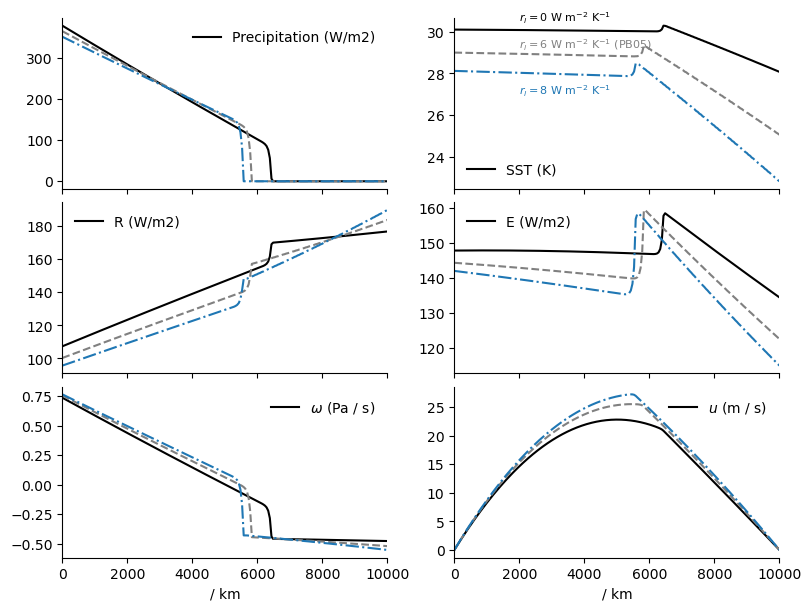

In [1341]:
%%time
#================
# Reproduce Fig. 4 of Peters & Bretherton (2005)
#================

"""
No low clouds
"""
# Example usage
model = WalkerCirculationModel(tau_c=2*3600, r_l=0)

# Solve
nday = 1000
t_span = (0, 86400*nday)  # 100 day simulation
sol = model.solve(t_span, t_eval=np.linspace(0,86400*nday,nday))

# Extract the solution
T = sol.y[:model.n, -1]
q = sol.y[model.n:2*model.n, -1]
Ts = sol.y[2*model.n:, -1]
P = model.precipitation(q, T)
R = model.R(T, q, Ts, P)
w = model.get_omega(P, R, T, model.x, q)
u = np.insert(cumulative_trapezoid(w/model.delta_p_T, model.x), 0, 0)
E = model.evaporation(T, Ts, q, P, u)

"""
With low clouds
"""
# Example usage
model2 = WalkerCirculationModel(tau_c=2*3600, r_l=6)

# Solve
nday = 1000
t_span = (0, 86400*nday)  # 100 day simulation
sol2 = model2.solve(t_span, t_eval=np.linspace(0,86400*nday,nday))

# Extract the solution
T2 = sol2.y[:model.n, -1]
q2 = sol2.y[model.n:2*model.n, -1]
Ts2 = sol2.y[2*model.n:, -1]
P2 = model2.precipitation(q2, T2)
R2 = model2.R(T2, q2, Ts2, P2)
w2 = model2.get_omega(P2, R2, T2, model2.x, q2)
u2 = np.insert(cumulative_trapezoid(w2/model2.delta_p_T, model2.x), 0, 0)
E2 = model.evaporation(T2, Ts2, q2, P2, u2)

"""
With stronger low clouds -- because r_l=6 W/m2/K isn't enough...
"""
# Example usage
model3 = WalkerCirculationModel(tau_c=2*3600, r_l=8)

# Solve
nday = 1000
t_span = (0, 86400*nday)  # 100 day simulation
sol3 = model3.solve(t_span, t_eval=np.linspace(0,86400*nday,nday))

# Extract the solution
T3 = sol3.y[:model.n, -1]
q3 = sol3.y[model.n:2*model.n, -1]
Ts3 = sol3.y[2*model.n:, -1]
P3 = model3.precipitation(q3, T3)
R3 = model3.R(T3, q3, Ts3, P3)
w3 = model3.get_omega(P3, R3, T3, model3.x, q3)
u3 = np.insert(cumulative_trapezoid(w3/model3.delta_p_T, model3.x), 0, 0)
E3 = model.evaporation(T3, Ts3, q3, P3, u3)

# Plot the results
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(8,6), layout='constrained')
axs[0,0].plot(model.x/1e3, (P), label='Precipitation (W/m2)', c='k')
axs[0,1].plot(model.x/1e3, Ts/const.cp + model.T_s0, label='SST (K)', c='k')
axs[1,0].plot(model.x/1e3, R, label='R (W/m2)', c='k')
axs[1,1].plot(model.x/1e3, E, label='E (W/m2)', c='k')
axs[2,0].plot(model.x/1e3, w, label=r'$\omega$ (Pa / s)', c='k')
axs[2,1].plot(model.x/1e3, u, label=r'$u$ (m / s)', c='k')

axs[0,0].plot(model.x/1e3, (P2),  c='grey', linestyle='--')
axs[0,1].plot(model.x/1e3, Ts2/const.cp + model.T_s0, c='grey', linestyle='--')
axs[1,0].plot(model.x/1e3, R2,  c='grey', linestyle='--')
axs[1,1].plot(model.x/1e3, E2,  c='grey', linestyle='--')
axs[2,0].plot(model.x/1e3, w2,  c='grey', linestyle='--')
axs[2,1].plot(model.x/1e3, u2, c='grey', linestyle='--')

axs[0,0].plot(model.x/1e3, (P3),  c='tab:blue', linestyle='-.')
axs[0,1].plot(model.x/1e3, Ts3/const.cp + model.T_s0, c='tab:blue', linestyle='-.')
axs[1,0].plot(model.x/1e3, R3,  c='tab:blue', linestyle='-.')
axs[1,1].plot(model.x/1e3, E3,  c='tab:blue', linestyle='-.')
axs[2,0].plot(model.x/1e3, w3,  c='tab:blue', linestyle='-.')
axs[2,1].plot(model.x/1e3, u3, c='tab:blue', linestyle='-.')

for ax in axs.flatten():
    ax.set_xlabel("")
    ax.set_xticks([0,2e3,4e3,6e3,8e3,10e3])
    ax.set_xticklabels(['','','','','',''])
    ax.legend(frameon=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(0,10e3)

#
axs[0,1].text(2000,30.5, r"$r_{l}=0$ W m$^{-2}$ K$^{-1}$", c='k', fontsize=8)
axs[0,1].text(2000,29.2, r"$r_{l}=6$ W m$^{-2}$ K$^{-1}$ (PB05)", c='grey', fontsize=8)
axs[0,1].text(2000,27, r"$r_{l}=8$ W m$^{-2}$ K$^{-1}$", c='tab:blue', fontsize=8)
axs[2,0].set_xlabel("/ km")
axs[2,1].set_xlabel("/ km")
axs[2,0].set_xticklabels(['0','2000','4000','6000','8000','10000'])
axs[2,1].set_xticklabels(['0','2000','4000','6000','8000','10000'])

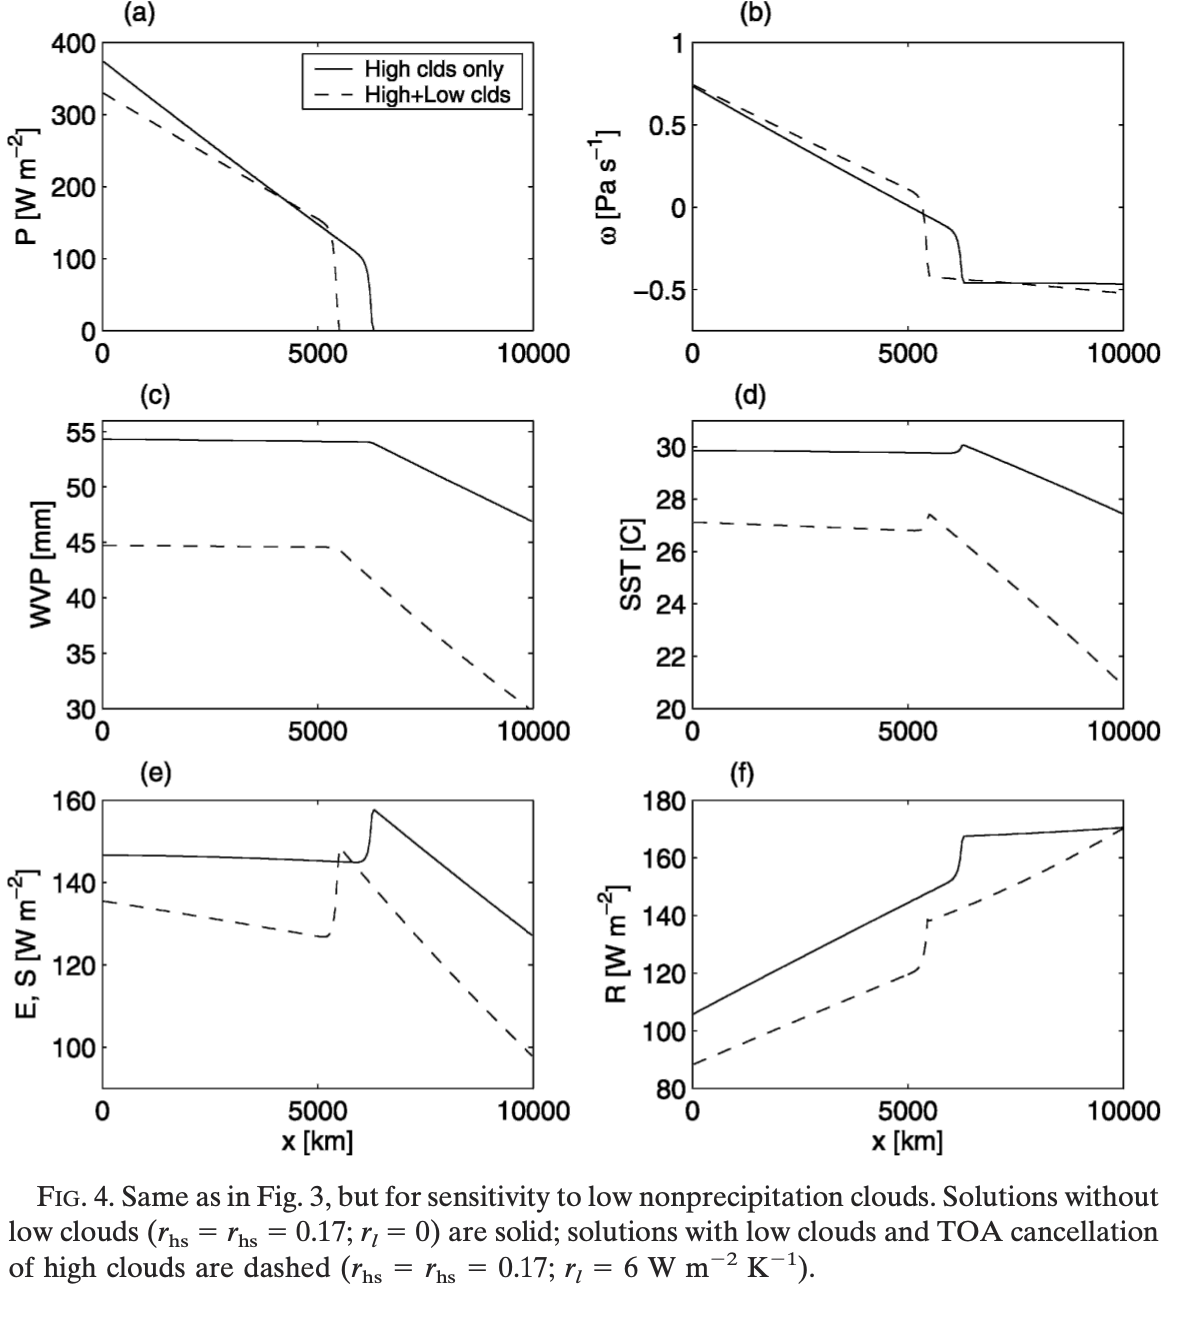

# Below: messy/untested stuff, trying to look at time-evolution of the model solution

Probably/definitely some bugs, feel free to fix (and do pull request)

### TODO

Make a function to output all of this stuff that i'm doing by hand (below)

In [1339]:
omega = xr.DataArray(np.zeros((model.n,len(sol.t))), dims=['x', 'time'], coords={'time':np.linspace(0,1000, len(sol.t)), 'x':np.linspace(0, model.A, model.n)})

for t_idx in range(len(sol.t)):
    T_tmp = sol2.y[:model.n, t_idx]
    q_tmp = sol2.y[model.n:2*model.n, t_idx]
    Ts_tmp = sol2.y[model.n:2*model.n, t_idx]
    P_tmp = model.precipitation(q_tmp, T_tmp)
    R_tmp = model.R(T_tmp, q_tmp, Ts_tmp, P_tmp)
    omega.loc[dict(time=np.linspace(0,1000, len(sol.t))[t_idx])] = model.get_omega(P_tmp, R_tmp, T_tmp, model.x)

TypeError: WalkerCirculationModel.get_omega() missing 1 required positional argument: 'q'

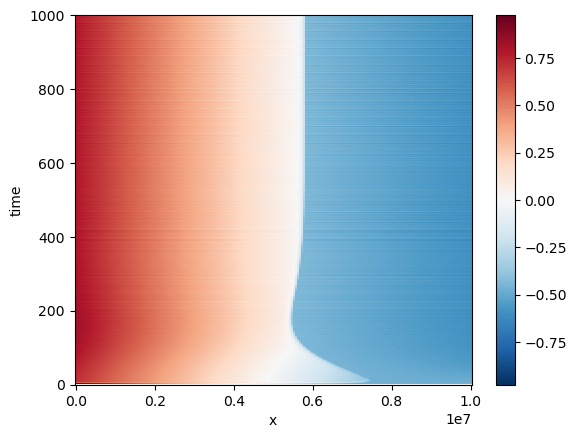

In [1239]:
omega.plot(y='time')

In [1240]:
u = xr.DataArray(np.zeros((model.n,len(sol.t))), dims=['x', 'time'], coords={'time':np.linspace(0,1000, len(sol.t)), 'x':np.linspace(0, model.A, model.n)})

for t_idx in range(len(sol.t)):
    T_tmp = sol2.y[:model.n, t_idx]
    q_tmp = sol2.y[model.n:2*model.n, t_idx]
    Ts_tmp = sol2.y[model.n:2*model.n, t_idx]
    P_tmp = model.precipitation(q_tmp, T_tmp)
    R_tmp = model.R(T_tmp, q_tmp, Ts_tmp, P_tmp)
    omega_tmp = model.get_omega(P_tmp, R_tmp, T_tmp, model.x)
    u.loc[dict(time=np.linspace(0,1000, len(sol.t))[t_idx])] = np.insert(cumulative_trapezoid(omega_tmp/model.delta_p_T, model.x), 0, 0)

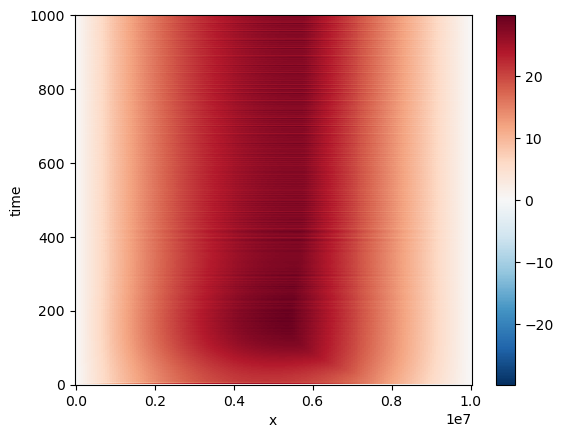

In [1241]:
u.plot(y='time')

In [1242]:
R = xr.DataArray(np.zeros((model.n,len(sol.t))), dims=['x', 'time'], coords={'time':np.linspace(0,1000, len(sol.t)), 'x':np.linspace(0, model.A, model.n)})

for t_idx in range(len(sol.t)):
    T_tmp = sol2.y[:model.n, t_idx]
    q_tmp = sol2.y[model.n:2*model.n, t_idx]
    Ts_tmp = sol2.y[model.n:2*model.n, t_idx]
    P_tmp = model.precipitation(q_tmp, T_tmp)
    R_tmp = model.R(T_tmp, q_tmp, Ts_tmp, P_tmp)
    R.loc[dict(time=np.linspace(0,1000, len(sol.t))[t_idx])] = R_tmp

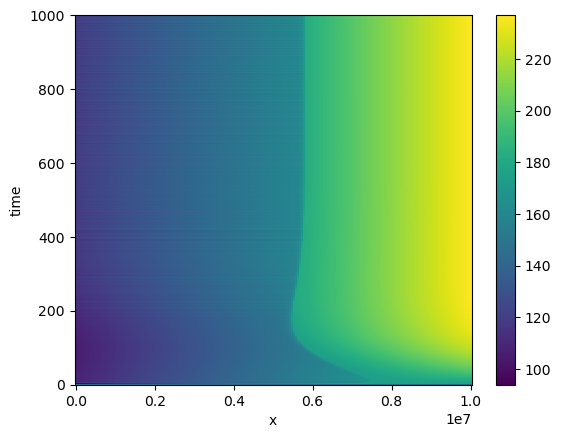

In [1243]:
R.plot(y='time')

In [1244]:
E = xr.DataArray(np.zeros((model.n,len(sol.t))), dims=['x', 'time'], coords={'time':np.linspace(0,1000, len(sol.t)), 'x':np.linspace(0, model.A, model.n)})

for t_idx in range(len(sol.t)):
    T_tmp = sol2.y[:model.n, t_idx]
    q_tmp = sol2.y[model.n:2*model.n, t_idx]
    Ts_tmp = sol2.y[model.n:2*model.n, t_idx]
    P_tmp = model.precipitation(q_tmp, T_tmp)
    R_tmp = model.R(T_tmp, q_tmp, Ts_tmp, P_tmp)
    omega_tmp = model.get_omega(P_tmp, R_tmp, T_tmp, model.x)
    u_tmp = np.insert(cumulative_trapezoid(omega_tmp/model.delta_p_T, model.x), 0, 0)
    E_tmp = model.evaporation(T_tmp, Ts_tmp, q_tmp, P_tmp, u_tmp)
    E.loc[dict(time=np.linspace(0,1000, len(sol.t))[t_idx])] = E_tmp

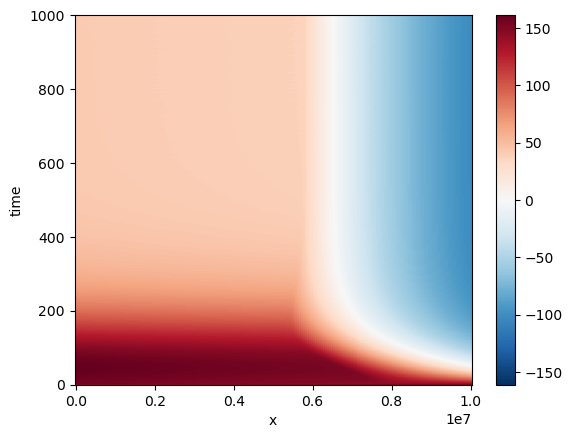

In [1245]:
E.plot(y='time')

In [1166]:
P = xr.DataArray(np.zeros((100,len(sol.t))), dims=['x', 'time'], coords={'time':np.linspace(0,100, len(sol.t)), 'x':np.linspace(0, 1e7, 100)})

for t_idx in range(len(sol.t)):
    T_tmp = sol.y[:100, t_idx]
    q_tmp = sol.y[100:2*100, t_idx]
    P_tmp = model.precipitation(q_tmp, T_tmp)
    P.loc[dict(time=np.linspace(0,100, len(sol.t))[t_idx])] = P_tmp

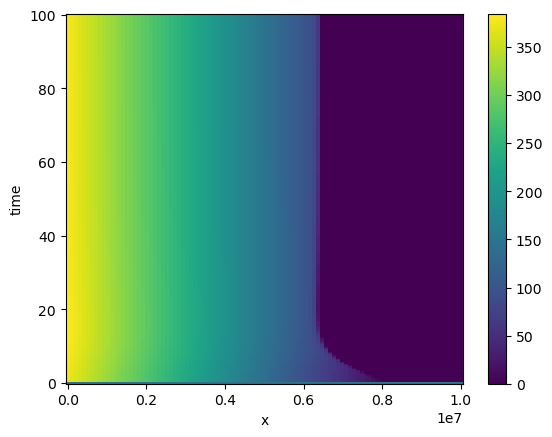

In [1167]:
P.plot(y='time')

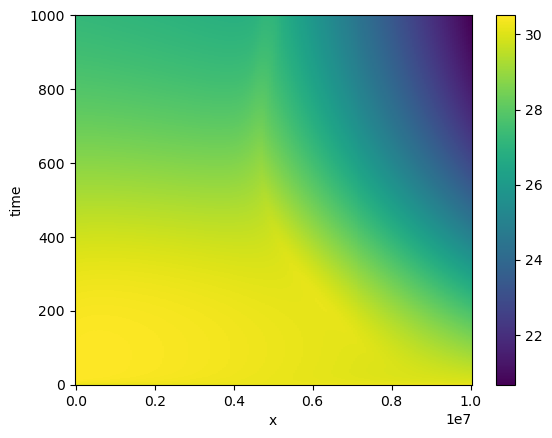

In [1230]:
da_Ts = xr.DataArray(sol.y[2*model.n:, :]/const.cp+30.2, dims=['x', 'time'], coords={'time':np.linspace(0,1000,len(sol.t)), 'x':model.x})
da_Ts.plot(y='time')

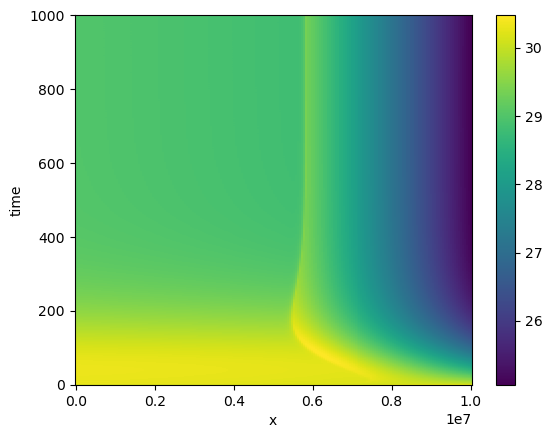

In [1246]:
da_Ts2 = xr.DataArray(sol2.y[2*model2.n:, :]/const.cp+30.2, dims=['x', 'time'], coords={'time':np.linspace(0,1000,len(sol.t)), 'x':model.x})
da_Ts2.plot(y='time')

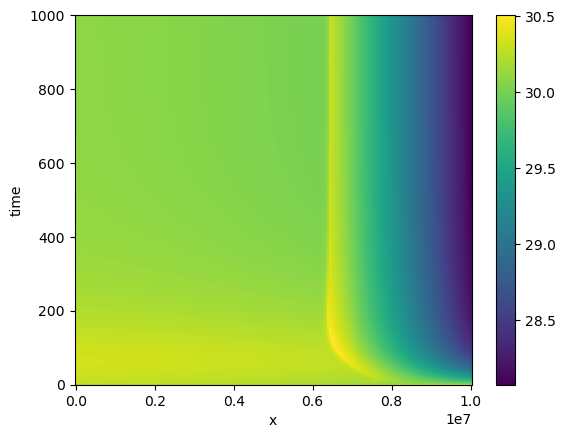

In [1247]:
da_Ts = xr.DataArray(sol.y[2*model.n:, :]/const.cp+30.2, dims=['x', 'time'], coords={'time':np.linspace(0,1000,len(sol.t)), 'x':model.x})
da_Ts.plot(y='time')

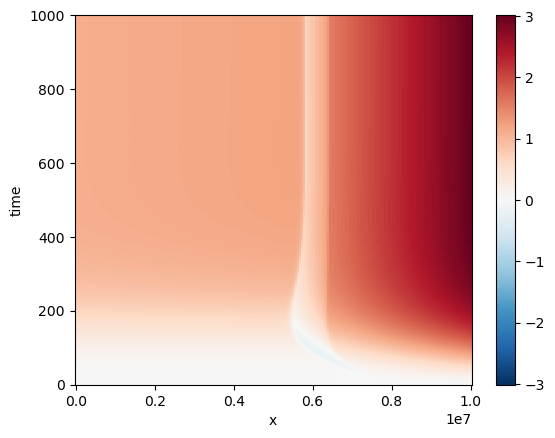

In [1248]:
(da_Ts-da_Ts2).plot(y='time')